# Проект - Анализ бизнес показателей (Procrastinate Pro+)

В вашем распоряжении данные о данны о пользователях, привлечённых с 1 мая по 27 октября 2019 года приложения Procrastinate Pro+.

Ход исследования:

- Загрузить данные и подготовьте их к анализу;

- Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии; 

- Провести исследовательский анализ данных; 

- Маркетинг; 

- Оцените окупаемость рекламы; 



### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
events = None

In [2]:
try:
    sessions = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    sessions = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
sessions.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Необходимо привести столбцы к нижнему регистру, а так же заменить пробелы на нижнее подчеркивание "_".

In [9]:
sessions.columns = sessions.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

Посмотрим снова информацию.

In [10]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим датафреймы на дубликаты.

In [13]:
sessions.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

Переведем столбцы к фармату datetime:

In [16]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Вывод.

Во время загрузки и подготовки данных к анализу, было сделано:

-импортировали библиотеки

-записали данные в 3 датафрейма

-привели название столбцов к нижнему регистру, а так же заменили пробелы в названиях на на нижнее подчеркивание "_"

-проверили датафреймы на пропуски и дубликаты

-заменили типы данных на datetime в столбцах с датами

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функция для создания пользовательских профилей

In [17]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

Функция для расчёта удержания

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта конверсии

In [19]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта LTV и ROI

In [20]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функции для построения графиков: filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()

Функция для сглаживания фрейма

In [21]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации удержания

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Функция для визуализации конверсии

In [23]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [24]:
#функция для визуализации LTV и ROI

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Вывод:

Задали основные функции:

— для создания профилей пользователей;

— для подсчёта Retention Rate;

— для подсчёта конверсии;

— для подсчёта LTV.

А также функции для построения графиков:

— для сглаживания данных;

— для построения графика Retention Rate;

— для построения графика конверсии;

— для визуализации LTV и ROI.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей.

In [26]:
profiles = get_profiles(sessions, orders, events, costs)

In [27]:
profiles .head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная дата привлечения:

In [28]:
print(profiles['first_ts'].min())

2019-05-01 00:00:41


Максимальная дата привлечения:

In [29]:
print(profiles['first_ts'].max())

2019-10-27 23:59:04


Вывод:

- минимальная дата привлечения 1 мая 2019г;

- максимальная дата привлечения 27 октября 2019г.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [30]:
region_buy = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'user_id', ascending = False)

In [31]:
region_buy['payer_per'] = region_buy['payer'] / region_buy['user_id'] * 100

In [32]:
region_buy.drop('payer', axis = 1)

,user_id,payer_per
region,,
United States,100002,6.901862
UK,17575,3.982930
France,17450,3.799427
Germany,14981,4.111875


Вывод:

- больше всего пользователей из United States 100002, из них 6,9% платящих;

- второе место у UK - это 17575 тыс пользователей, из них 3.98% платящих;

- третье место у France - это 17450 тыс пользователей, из них 3,79% платящих.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

In [33]:
device_buy = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'user_id', ascending = False)

In [34]:
device_buy['payer_per'] = device_buy['payer'] / device_buy['user_id'] * 100

In [35]:
device_buy.drop('payer', axis = 1)

,user_id,payer_per
device,,
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790
Mac,30042,6.364423


Вывод:

- Больше всего пользователей, а именно 54479, которые предпочитают iPhone, из них 6,2% платящих;

- На втором месте пользователи Android - 35032 пользователей, из них 5,85% платящих;

- На третьем месте, являются пользователи PC. Численность пользователей составляет 30455, из них 5,05% платящих.

#### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
channel_buy = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})

In [37]:
channel_buy['payer_per'] = channel_buy['payer'] / channel_buy['user_id'] * 100

In [38]:
channel_buy.sort_values(by = 'payer', ascending = False)

,user_id,payer,payer_per
channel,,,
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
organic,56439,1160,2.055316
WahooNetBanner,8553,453,5.296387
AdNonSense,3880,440,11.340206
RocketSuperAds,4448,352,7.913669
LeapBob,8553,262,3.063253
OppleCreativeMedia,8605,233,2.707728
lambdaMediaAds,2149,225,10.469986


Вывод:

топ-3:

FaceBoom, 3557 платящих пользователей или 12,2% из 29144 привлеченных;

TipTop - 1878 платящих пользователей или 9,6% из 19561 привлеченных;

organic - 1160 платящих пользователей или 2% из 56439 привлеченных.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг.

In [39]:
costs['costs'].sum()

105497.30000000002

Общая сумма расхода на маркетинг 105497

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [40]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


В основном выделяются 2 канала: TipTop и FaceBoom. Их значения в разы больше, чем у остальных источников. Можно сделать вывод, что это 2 основных рекламных источника, откуда приходят пользователи.

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.

Добавим столбцы с номером недели и месяца

In [41]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [42]:
costs['month'] = costs['dt'].dt.month

Строим графики

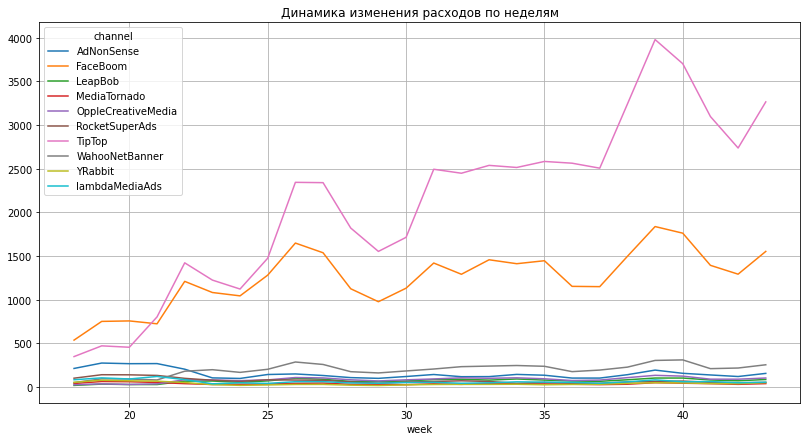

In [43]:
plt.figure(figsize=(30, 7))
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям')
plt.show()

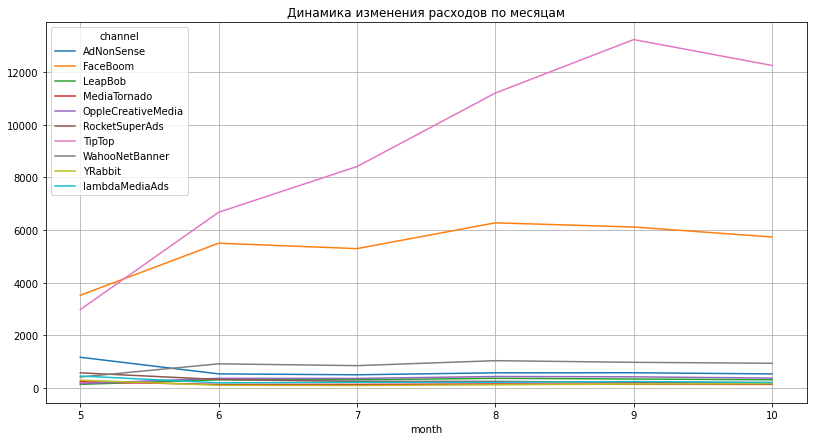

In [44]:
plt.figure(figsize=(30, 7))
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам')
plt.show()

Исходя из графиков можно сказать, что здесь также выбиваются TipTop, FaceBoom. Скорее всего, это всязано с тем, что, у платформ много пользователей и из-за этого много затрат.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Привлечение одного пользователя в среднем по каждому каналу стоило:

In [45]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).mean().sort_values(ascending = False)

channel
TipTop                2.655599
FaceBoom              1.112864
AdNonSense            1.010467
lambdaMediaAds        0.721029
WahooNetBanner        0.599336
RocketSuperAds        0.406634
OppleCreativeMedia    0.249327
MediaTornado          0.218692
YRabbit               0.211194
LeapBob               0.209443
organic               0.000000
dtype: float64

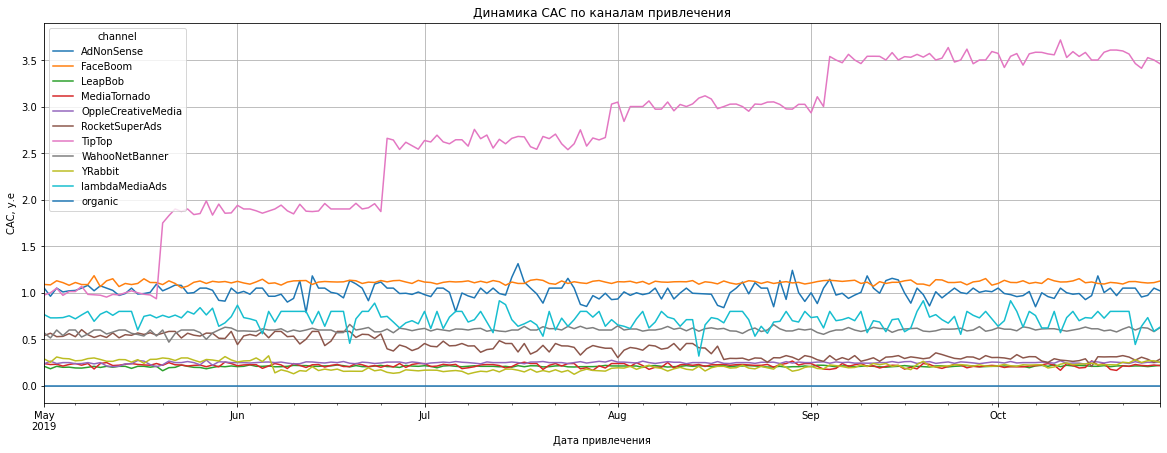

In [46]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 7))
plt.ylabel('CAC, у.е')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Исходя из динамики САС существенные изменения наблюдаются только у канала TipTop - стоимость привлечения одного пользователя выросла в 3,5 раза за 5 месяцев
Самыми дорогими в среднем за все время оказались каналы TipTop, FaceBoom, AdNonSense.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Зададим момент и горизонт анализа

In [47]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Исключим канал organic, так как стоимость их привлечения 0

In [48]:
profiles = profiles.query('channel != "organic"')

Считаем LTV и ROI

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

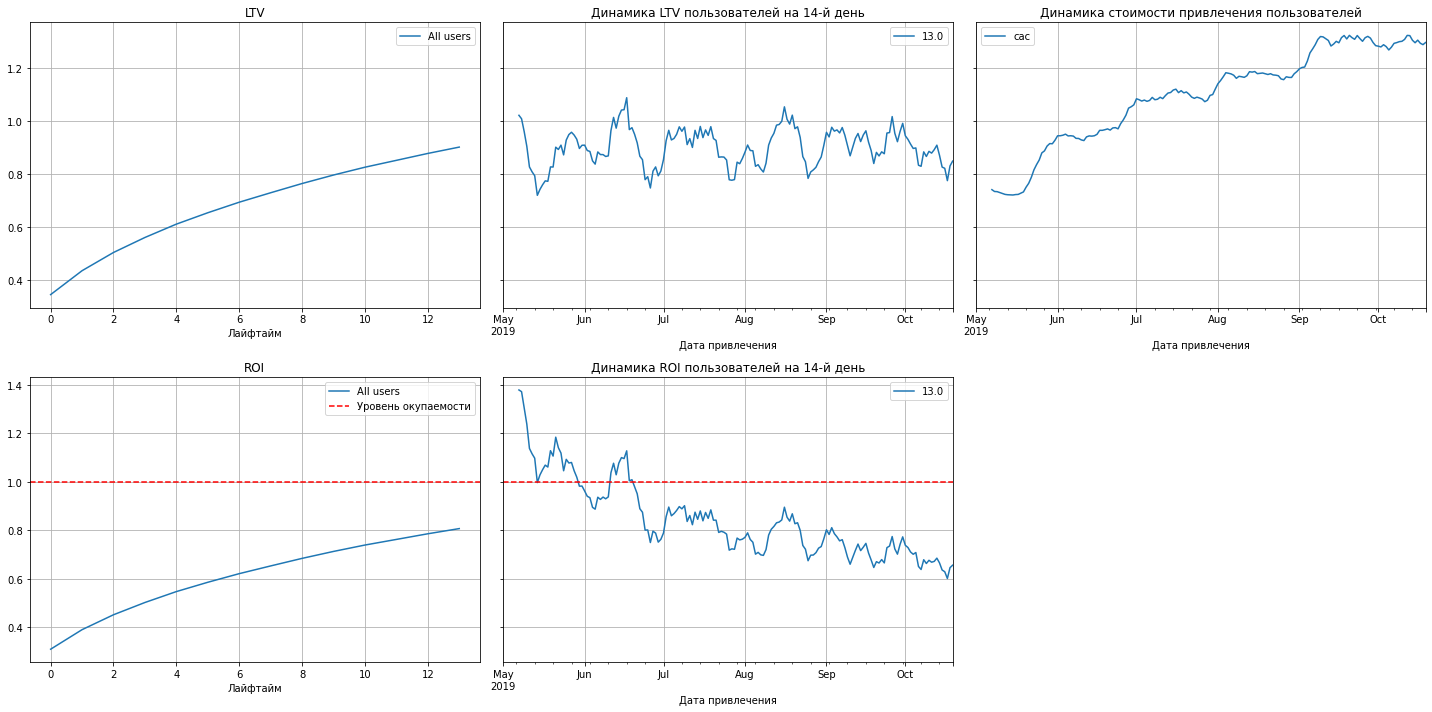

In [50]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

Реклама не окупается. ROI в конце недели — чуть выше 80%.
После июня ROI меньше уровня окупаемости.
Цена привлечения пользователя резко растет, вместе с ней падает окупаемость.
Показатель LTV достаточно стабилен. Значит, проблема не в этом параметре.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим графики конверсии и удержания.

Построим графики конверсии и динамики конверсии

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

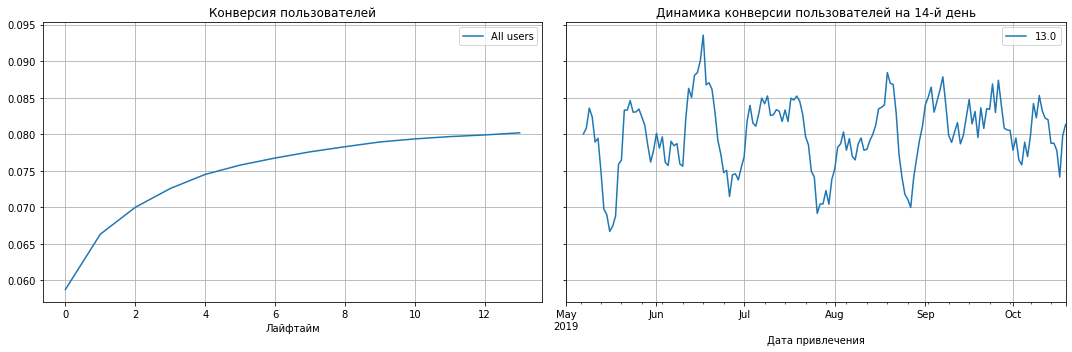

In [52]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия хорошая, причем постоянная.

Построим удержание

In [53]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days
)

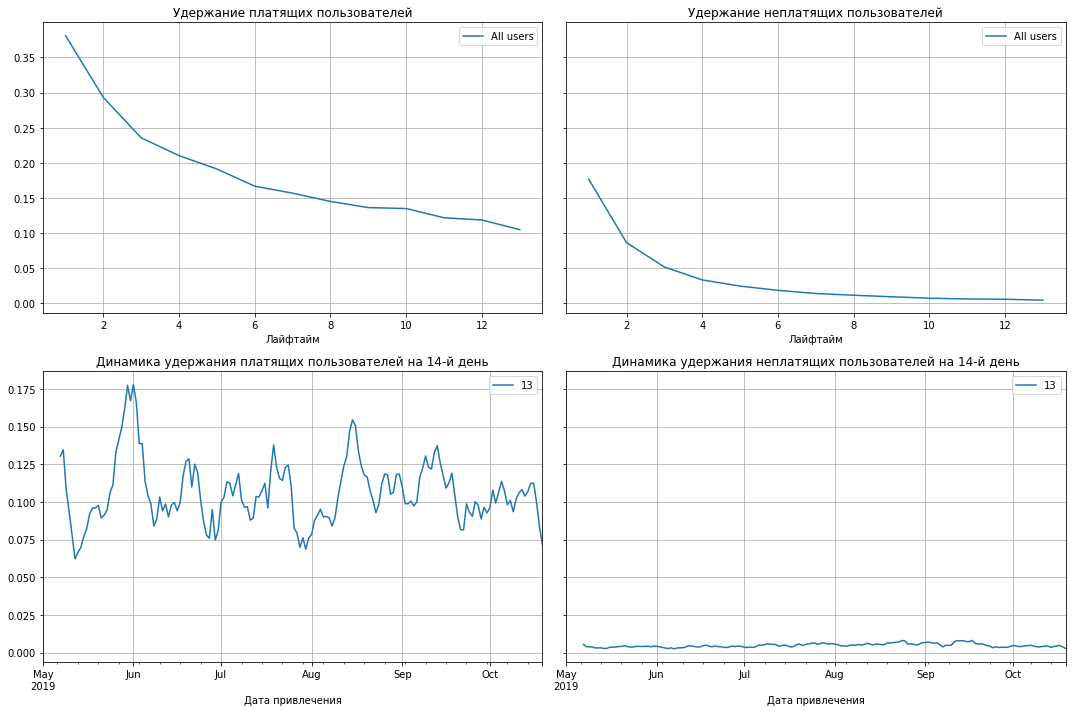

In [54]:
plot_retention(retention_grouped, retention_history, horizon_days)

Параметры конверсии и удержания на протяжении исследуемого периода остаются стабильными. Следует посмотреть как они изменяться если построить их по устройству, региону или каналу привлечения.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Смотрим окупаемость с разбивкой по устройствам

In [55]:
dimensions = ['device']

In [56]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

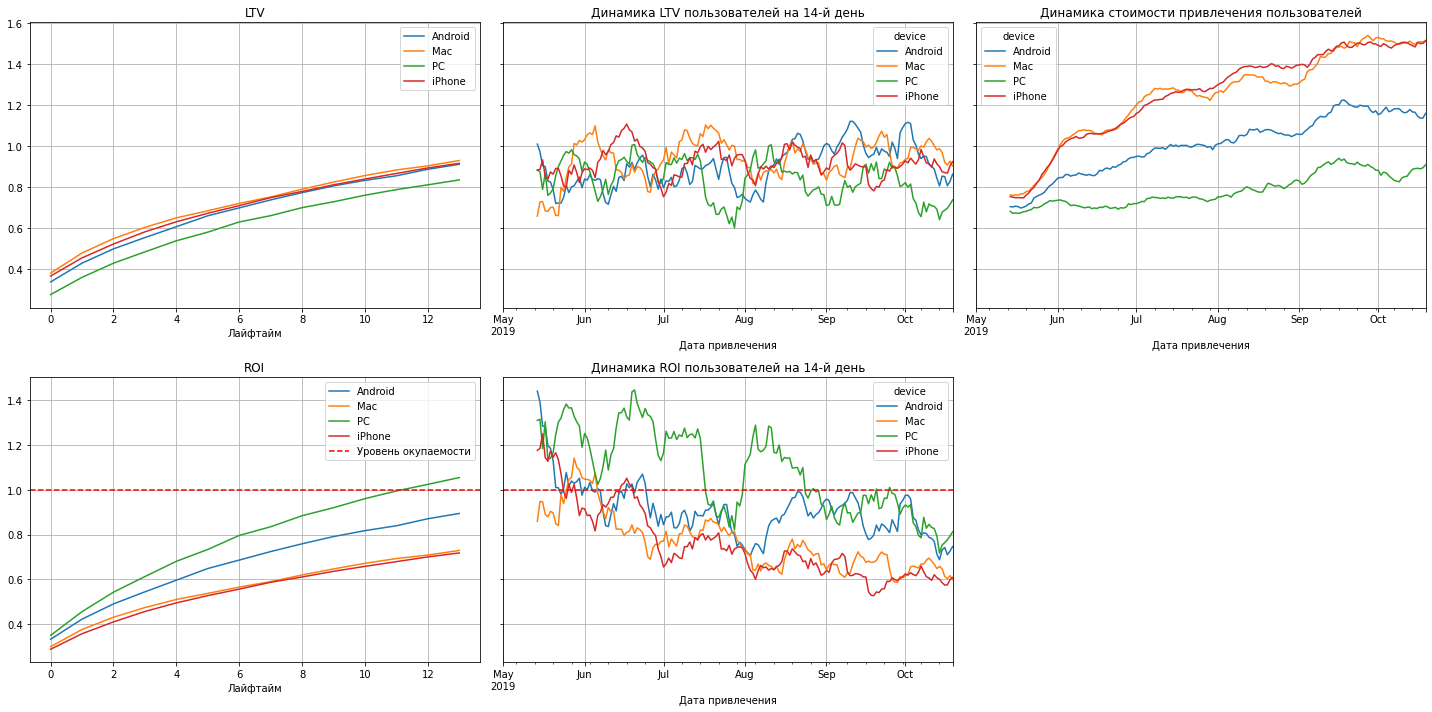

In [57]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Окупаются к 14 дню только поьзователи персональых компьютеров.
Пользователи iPhone и Mac не окупаются за 2 недели. Скорее всего дело в стоимости привлечения этих устройств(она значительно выше, чем стоимость привлечения других устройств).

Расчёт конверсии

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [59]:
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.058309,0.066141,0.070058,0.072378,0.074506,0.075714,0.076923,0.077552,0.078083,0.078809,0.079147,0.079437,0.079776,0.079921
Mac,17747,0.064349,0.072970,0.076802,0.079281,0.080971,0.082267,0.083225,0.084014,0.084747,0.085648,0.086268,0.086493,0.086606,0.087057
PC,18128,0.046613,0.053067,0.055991,0.058142,0.060293,0.061562,0.062665,0.063438,0.064100,0.064431,0.064707,0.064872,0.065093,0.065368
iPhone,32086,0.062800,0.070249,0.074113,0.077136,0.078944,0.080253,0.081001,0.082061,0.082871,0.083526,0.083962,0.084429,0.084648,0.084959


Исходя из расчета конверсии пользователи Mac и iPhone за анализируемый период совершают покупки чаще чем пользователи PC и Android.

Расчёта удержания

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

In [61]:
retention_grouped

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      Mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      PC             16920  1.0  0.174704  0.087234  0.052364  0.034574   
      iPhone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
True  Android         1695  1.0  0.384661  0.298525  0.250147  0.214159   
      Mac             1597  1.0  0.365059  0.284283  0.202880  0.196619   
      PC              1208  1.0  0.421358  0.333609  0.262417  0.261589   
      iPhone          2810  1.0  0.370463  0.277224  0.233808  0.193594   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      Mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      PC       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
      iPhone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
True  Android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   
      Mac      0.172198  0.148403  0.142768  0.136506  0.132123  0.120852   
      PC       0.209437  0.225166  0.192053  0.175497  0.149834  0.163907   
      iPhone   0.185053  0.158363  0.144128  0.135943  0.132384  0.132028   

                     11        12        13  
payer device                                 
False Android  0.006530  0.005477  0.005056  
      Mac      0.006440  0.006254  0.004025  
      PC       0.005437  0.005851  0.005556  
      iPhone   0.006832  0.006319  0.004372  
True  Android  0.110914  0.128614  0.107375  
      Mac      0.115216  0.108954  0.110833  
      PC       0.148179  0.144040  0.124172  
      iPhone   0.120996  0.107473  0.091815

Исходя из таблицы удержаний можно так же увидеть, что вернувшихся пользователей больше у PC и Android, в то время как у Mac и iPhone таких пользователей меньше.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [62]:
dimensions = ['region']

In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

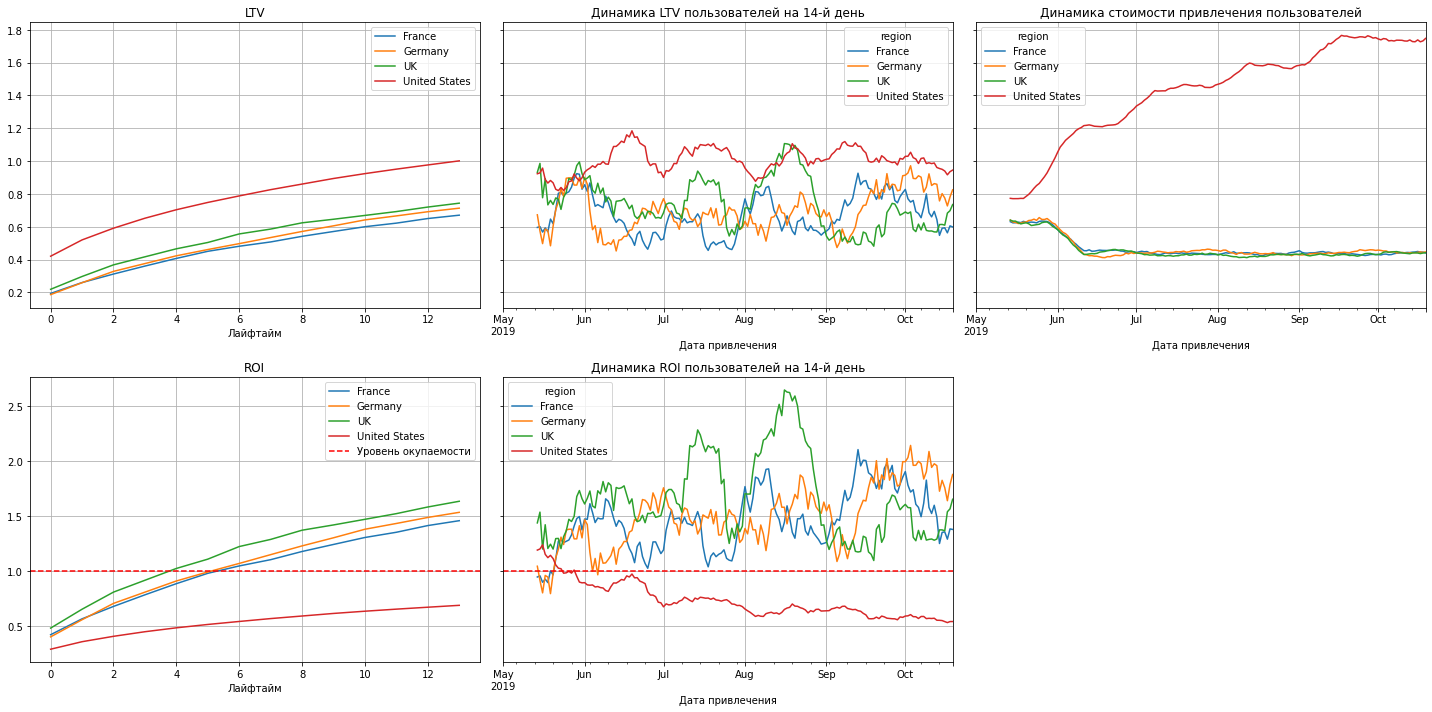

In [64]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Здесь видим, что привлечение пользователей из United States, которые составляют основную массу 100 тыс человек, обходятся очень дорого. Стоимость привлечения одного пользователя из United States в 4 раза дороже(в октябре), чем привлечение пользователя из других стран.
Пользователи из United States не окупаются за 2 недели, к концу 14 дня их окупаемость всего около 60%

Расчёт конверсии

In [65]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [66]:
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.033092,0.037467,0.040985,0.042697,0.044313,0.045359,0.046120,0.046405,0.046976,0.047547,0.047642,0.048117,0.048307,0.048402
Germany,9030,0.032337,0.038760,0.041528,0.043854,0.045072,0.046512,0.047398,0.048283,0.049059,0.049612,0.049723,0.049834,0.049945,0.050498
UK,10536,0.034074,0.039104,0.042426,0.044039,0.045368,0.046412,0.047551,0.048121,0.048405,0.048595,0.048975,0.049070,0.049165,0.049165
United States,58562,0.071873,0.080650,0.084560,0.087497,0.089700,0.091032,0.092022,0.093013,0.093798,0.094566,0.095096,0.095454,0.095728,0.096069


Исходя из расчета конверсии пользователи из United States совершают покупки чаще, чем другие страны. Но и пользователей в данный стране в разы больше по сравнению с другими странами.

Расчёта удержания

In [67]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

In [68]:
retention_grouped

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                9993  1.0  0.173021  0.091164  0.052036  0.033724   
      Germany               8563  1.0  0.176690  0.084900  0.056172  0.035034   
      UK                   10002  1.0  0.179064  0.088582  0.051390  0.031994   
      United States        52776  1.0  0.177221  0.085626  0.051160  0.033500   
True  France                 523  1.0  0.474187  0.386233  0.323136  0.307839   
      Germany                467  1.0  0.483940  0.402570  0.314775  0.327623   
      UK                     534  1.0  0.483146  0.421348  0.327715  0.299625   
      United States         5786  1.0  0.354822  0.263913  0.212755  0.183719   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022616  0.018213  0.014610  0.012108  0.010607   
      Germany        0.025225  0.019503  0.014014  0.010510  0.009926   
      UK             0.024595  0.017696  0.015897  0.011598  0.008498   
      United States  0.025030  0.018777  0.013813  0.011880  0.009474   
True  France         0.296367  0.246654  0.239006  0.223709  0.204589   
      Germany        0.284797  0.244111  0.220557  0.239829  0.211991   
      UK             0.277154  0.271536  0.247191  0.198502  0.155431   
      United States  0.166263  0.143623  0.136018  0.125475  0.122364   

                           10        11        12        13  
payer region                                                 
False France         0.007805  0.006304  0.005304  0.005504  
      Germany        0.007007  0.005722  0.006890  0.006540  
      UK             0.007299  0.006899  0.006399  0.004499  
      United States  0.007541  0.006423  0.005931  0.004301  
True  France         0.210325  0.168260  0.189293  0.173996  
      Germany        0.233405  0.173448  0.160600  0.134904  
      UK             0.168539  0.192884  0.183521  0.177903  
      United States  0.117179  0.106982  0.103007  0.089526

По таблице ударжаний можно сделать вывод, что вернувшихся пользователей больше в станах France и Germany, наименьшее значение в стране United States.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Посмотрим окупаемость с разбивкой по источникам привлечения

In [69]:
dimensions = ['channel']

In [70]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

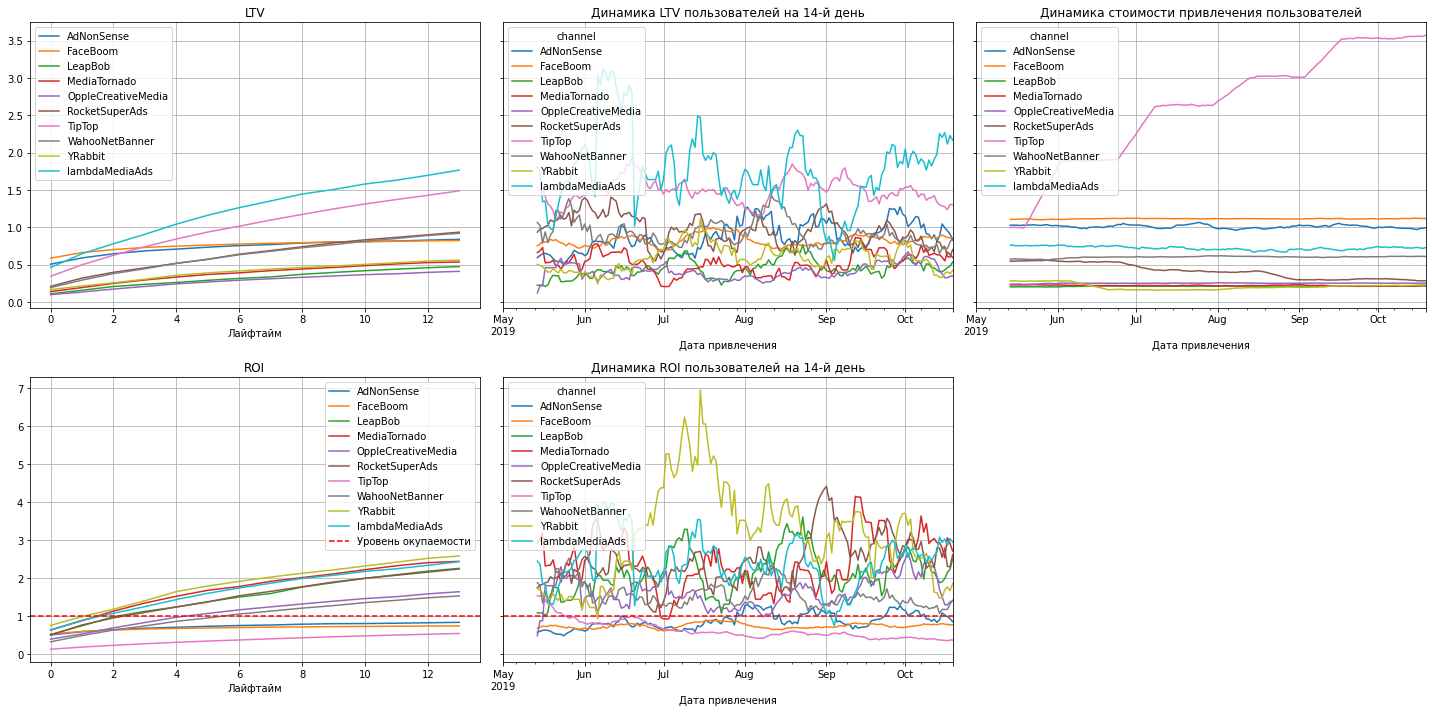

In [71]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Пользователи пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются за 14 дней.

Расчёт конверсии

In [72]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [73]:
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
LeapBob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
OppleCreativeMedia,8139,0.017324,0.019904,0.021501,0.023099,0.023713,0.024573,0.025310,0.025556,0.025556,0.025802,0.025925,0.026047,0.026047,0.026293
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
WahooNetBanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055


На основании из расчета конверсии, можно сказать, что ATipTop, FaceBoom и AdNonSence имеет хорошие показатели конверсии.

Расчёта удержания

In [74]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

In [75]:
retention_grouped

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob             0.010433  0.007252  0.006616  0.005344  0.004835  
      MediaTornado        0.008460  0.007216  0.008957  0.004479  0.004976  
      OppleCreativeMedia  0.008461  0.008334  0.005556  0.007198  0.005683  
      RocketSuperAds      0.007661  0.007150  0.008427  0.003830  0.002809  
      TipTop        

Однако, исходя из таблицы удержания, % вернувшихся у каналов ATipTop, FaceBoom и AdNonSence не большой

Вывод:

В целом реклама на привлечение пользователей не окупается.

Негативное влияние на окупаемость рекламы оказывают:

- пользователи из United States(основная масса пользователей), они обходятся в несколько раз дороже, чем пользователи из других стран. Как итог, они не окупаются;

- пользователи, которые пользуются iPhone(основная масса пользователей) и Mac обходятся дороже, чем пользователи других устройств;

- пользователи, пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются, так как их привлечение дороже остальных.

- Проблемы окупаемости вызваны тем, что затраты на привлечение пользователей основных масс, обходятся слишком дорого.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

На этапе загрузите данных и подготовьке к анализу были приведены название столбцов к нижнему регистру, а так же заменили пробелы в названиях на на нижнее подчеркивание "_", проверили датафреймы на пропуски и дубликаты изаменили типы данных на datetime в столбцах с датами.

Были заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии: get_profiles(), get_retention(), get_conversion(), get_ltv(), filter_data, plot_retention(), plot_ltv_roi.

В исследовательскот анализе данных: 

Составили профили пользователей. Определите минимальную и максимальную даты привлечения пользователей:

- минимальная дата привлечения 1 мая 2019г;

- максимальная дата привлечения 27 октября 2019г.

Выяснили, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построили таблицу, отражающую количество пользователей и долю платящих из каждой страны.

- больше всего пользователей из United States 100002, из них 6,9% платящих;

- второе место у UK - это 17575 тыс пользователей, из них 3.98% платящих;

- третье место у France - это 17450 тыс пользователей, из них 3,79% платящих..

Узнали, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построили таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

- Больше всего пользователей, а именно 54479, которые предпочитают iPhone, из них 6,2% платящих;

- На втором месте пользователи Android - 35032 пользователей, из них 5,85% платящих;

- На третьем месте, являются пользователи PC. Численность пользователей составляет 30455, из них 5,05% платящих.

Изучили рекламные источники привлечения и определили каналы, из которых пришло больше всего платящих пользователей. Построили таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

топ-3:

- FaceBoom, 3557 платящих пользователей или 12,2% из 29144 привлеченных;

- TipTop - 1878 платящих пользователей или 9,6% из 19561 привлеченных;

- organic - 1160 платящих пользователей или 2% из 56439 привлеченных.

В маркетинге:

Посчитали общую сумму расходов на маркетинг, которая составила 105497.

Выяснили, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник. В основном выделяются 2 канала: TipTop и FaceBoom. Их значения в разы больше, чем у остальных источников. Можно сделать вывод, что это 2 основных рекламных источника, откуда приходят пользователи.

Построили график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику и визуализирували динамику изменения расходов во времени по месяцам по каждому источнику. Здесь также выбиваются TipTop, FaceBoom. Скорее всего, это всязано с тем, что, у платформ много пользователей и из-за этого много затрат.

Узнали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Исходя из динамики САС существенные изменения наблюдаются только у канала TipTop - стоимость привлечения одного пользователя выросла в 3,5 раза за 5 месяцев
Самыми дорогими в среднем за все время оказались каналы TipTop, FaceBoom, AdNonSense.


При оцените окупаемость рекламы задали момент и горизонт анализа:

observation_date = datetime(2019, 11, 1).date() момент анализа (1 ноября 2019 г.)

horizon_days = 14 горизонт анализа (две недели)

Проанализирвоапли окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. Реклама не окупается. ROI в конце недели — чуть выше 80%. После июня ROI меньше уровня окупаемости. Цена привлечения пользователя резко растет, вместе с ней падает окупаемость. Показатель LTV достаточно стабилен. Значит, проблема не в этом параметре.


Проверили конверсию пользователей и динамику её изменения. То же самое сделали с удержанием пользователей. Построили и изучили графики конверсии и удержания. Параметры конверсии и удержания на протяжении исследуемого периода остаются стабильными. Следует посмотреть как они изменяться если построить их по устройству, региону или каналу привлечения.

Проанализировали окупаемость рекламы с разбивкой по устройствам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Окупаются к 14 дню только поьзователи персональых компьютеров. Пользователи iPhone и Mac не окупаются за 2 недели. Скорее всего дело в стоимости привлечения этих устройств(она значительно выше, чем стоимость привлечения других устройств).

Проанализировали окупаемость рекламы с разбивкой по странам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Здесь видим, что привлечение пользователей из United States, которые составляют основную массу 100 тыс человек, обходятся очень дорого. Стоимость привлечения одного пользователя из United States в 4 раза дороже (в октябре), чем привлечение пользователя из других стран. Пользователи из United States не окупаются за 2 недели, к концу 14 дня их окупаемость всего около 60%

Проанализировали окупаемость рекламы с разбивкой по рекламным каналам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Пользователи пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются за 14 дней.

В целом реклама на привлечение пользователей не окупается.

Негативное влияние на окупаемость рекламы оказывают:

- пользователи из United States(основная масса пользователей), они обходятся в несколько раз дороже, чем пользователи из других стран. Как итог, они не окупаются;

- пользователи, которые пользуются iPhone(основная масса пользователей) и Mac обходятся дороже, чем пользователи других устройств;

- пользователи, пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются, так как их привлечение дороже остальных.

- Проблемы окупаемости вызваны тем, что затраты на привлечение пользователей основных масс, обходятся слишком дорого.

Рекомендации:

- Сменить каналы привлечения, TipTop, FaceBoom имеют огромный рекламный бюджет и в основном не приносят никакой прибыли.

- Привлекать больше пользователей из UK, France и Germany. Пользователи Unated States обходяится очень дорого.

- Привлекать больше Android и PC пользователей.